alphas.shape=(179,)
y.shape=(49225,)
Np=15
C.shape=(2, 100)


100%|██████████| 3/3 [00:00<00:00, 1500.82it/s]

p.shape=(100,)
p, [ 8.3231419   9.16181247 10.00048303 10.8391536  11.67782417 12.51649474
 13.35516531 14.19383587 15.03250644 15.87117701  7.77850286  8.61717343
  9.455844   10.29451457 11.13318513 11.9718557  12.81052627 13.64919684
 14.48786741 15.32653797  7.23386383  8.0725344   8.91120496  9.74987553
 10.5885461  11.42721667 12.26588724 13.1045578  13.94322837 14.78189894
  6.68922479  7.52789536  8.36656593  9.2052365  10.04390706 10.88257763
 11.7212482  12.55991877 13.39858934 14.2372599   6.14458576  6.98325633
  7.82192689  8.66059746  9.49926803 10.3379386  11.17660917 12.01527973
 12.8539503  13.69262087  5.59994672  6.43861729  7.27728786  8.11595843
  8.95462899  9.79329956 10.63197013 11.4706407  12.30931127 13.14798183
  5.05530769  5.89397826  6.73264882  7.57131939  8.40998996  9.24866053
 10.0873311  10.92600166 11.76467223 12.6033428   4.51066865  5.34933922
  6.18800979  7.02668036  7.86535092  8.70402149  9.54269206 10.38136263
 11.2200332  12.05870376  3.96602

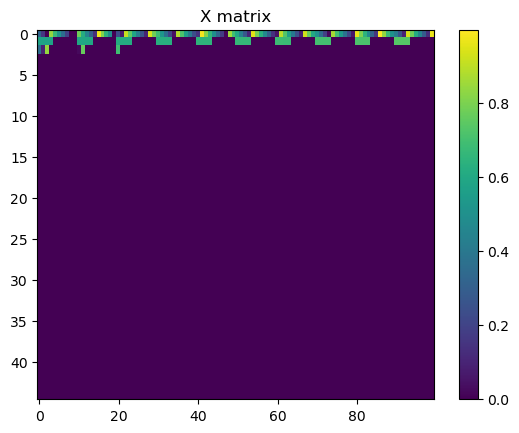

In [39]:
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

def construct_X(M, alphas, Np=None):
    if Np is None:
        Np = int(np.ceil(np.sqrt(2) * M))
    if Np % 2 == 0:
        Np = Np + 1 # get an odd number for Np
    print(f"Np={Np}")

    D = M * M
    No = len(alphas)
    N = Np * No

    h = 1
    a0 = (M - 1) / 2 # -(M - 1) / 2
    b0 = (M - 1) / 2 # -(M - 1) / 2
    s0= (Np - 1) / 2
    ja = np.mgrid[0:D] % M
    jb = np.mgrid[0:D] // M
    C = np.stack((a0 + ja * h, b0 + jb * h))
    print(f"C.shape={C.shape}")

    i_indices = []
    j_indices = []
    weights = []

    for alpha_idx in tqdm(range(len(alphas))):
        alpha = alphas[alpha_idx]
        n = np.array([np.cos(np.deg2rad(alpha)), np.sin(np.deg2rad(alpha))])
        # p = np.dot(C.transpose((1, 2, 0)), n) + 1
        p = np.dot(n.T, C) + s0
        print(f"p.shape={p.shape}")
        print("p,",p)

        mask = np.logical_and(p > 0, p < Np)
        indices = np.where(mask)
        print("indices,",indices)
        # indices = p

        if len(indices[0]) > 0:
            i_indices.extend([alpha_idx] * len(indices[0]))
            j_indices.extend(indices[0])
            weights.extend(p[indices] - np.floor(p[indices])) 
            # weights.extend(p[indices])

    print("i_indices,",i_indices)
    X = coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype=np.float32)

    return X

data_path = "./data/"

y = np.load(os.path.join(data_path, "y_195.npy"))
alphas = np.load(os.path.join(data_path, "alphas_195.npy"))

# Example usage
print(f"alphas.shape={alphas.shape}")
print(f"y.shape={y.shape}")
M = y.shape[0]
# X = construct_X(M, alphas)
alphas=[-33,1,42]
X = construct_X(10, alphas)

# Convert sparse matrix to dense numpy array for visualization
X_dense = X.toarray()
print(X_dense.shape)
print(X_dense)

# Visualize the matrix with the adjusted color scale
plt.imshow(X_dense, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('X matrix')
plt.show()
